# STA130 HW6 Due Nov.7

## Q1

In a Simple Linear Regression model, we aim to describe the relationship between a predictor variable \( x \) and an outcome variable \( Y \) using a linear equation. This model assumes that the outcome \( Y \) depends linearly on \( x \) with some added random noise. The model equation is:

\[
Y = beta_0 + beta_1 x + epsilon
\]

where:
- **\( beta_0 \)** is the intercept, representing the value of \( Y \) when \( x = 0 \).
- **\( beta_1 \)** is the slope, showing the change in \( Y \) for a one-unit increase in \( x \).
- **\( epsilon \)** is the error term, representing the randomness or noise in \( Y \). It's typically assumed to follow a normal distribution with mean 0 and some standard deviation \( sigma \)
xc 
This model implies that for each value of \( x \), the outcome \( Y \) is a random variable that follows a normal distribution centered around \( beta_0 + beta_1 x \) with standard deviation \( sigma \). In other words, \( Y \) values are distributed around a "true" line defined by \( beta_0 + beta_1 x \), with some spread due to the error term.




In [3]:
import numpy as np
from scipy.stats import norm, uniform
import plotly.graph_objects as go

# Define parameters for the regression model
n = 100  # Sample size
beta0 = 5  # Intercept
beta1 = 2  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor variable x from a uniform distribution
x = uniform.rvs(loc=0, scale=10, size=n)

# Generate error terms from a normal distribution
errors = norm.rvs(loc=0, scale=sigma, size=n)

# Generate outcome variable Y according to the theoretical model
Y = beta0 + beta1 * x + errors

# Visualize the results using Plotly
fig = go.Figure()

# Scatter plot of the generated data points
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Add the theoretical regression line (without noise)
fig.add_trace(go.Scatter(x=x, y=beta0 + beta1 * x, mode='lines', name='Regression Line'))

fig.update_layout(title="Simple Linear Regression Model (Theoretical)",
                  xaxis_title="Predictor (x)",
                  yaxis_title="Outcome (Y)")
fig.show()

## Q2

### Steps:
1. Simulate a dataset based on our theoretical Simple Linear Regression model.
2. Use `statsmodels` to fit a regression model to the data.
3. Visualize the original data points and the fitted regression line.

Here’s the code to demonstrate these steps:

In [4]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Define parameters for the regression model
n = 100  # Sample size
beta0 = 5  # Intercept
beta1 = 2  # Slope
sigma = 1  # Standard deviation of the error term

# Generate predictor variable x from a uniform distribution
x = np.random.uniform(0, 10, n)

# Generate error terms from a normal distribution
errors = np.random.normal(0, sigma, n)

# Generate outcome variable Y according to the theoretical model
Y = beta0 + beta1 * x + errors

# Create a pandas DataFrame for use with statsmodels
data = pd.DataFrame({'x': x, 'Y': Y})

# Fit a Simple Linear Regression model using statsmodels
model = smf.ols(formula='Y ~ x', data=data).fit()

# Print the summary of the fitted model
print(model.summary())

# Predicted values based on the fitted model
data['Y_pred'] = model.predict(data['x'])

# Visualization using Plotly
fig = go.Figure()

# Scatter plot of the actual data points
fig.add_trace(go.Scatter(x=data['x'], y=data['Y'], mode='markers', name='Data'))

# Line plot of the fitted regression line
fig.add_trace(go.Scatter(x=data['x'], y=data['Y_pred'], mode='lines', name='Fitted Regression Line'))

fig.update_layout(title="Fitted Simple Linear Regression Model",
                  xaxis_title="Predictor (x)",
                  yaxis_title="Outcome (Y)")
fig.show()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     2386.
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.31e-70
Time:                        04:36:10   Log-Likelihood:                -151.53
No. Observations:                 100   AIC:                             307.1
Df Residuals:                      98   BIC:                             312.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1985      0.239     21.767      0.0

## Q3

In [7]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import statsmodels.formula.api as smf

# Define parameters for the regression model
n = 100  # Sample size
beta0 = 5  # Theoretical intercept
beta1 = 2  # Theoretical slope
sigma = 1  # Standard deviation of the error term

# Function to generate a new dataset, fit the model, and plot both lines
def simulate_and_plot():
    # Generate predictor variable x from a uniform distribution
    x = np.random.uniform(0, 10, n)

    # Generate error terms from a normal distribution
    errors = np.random.normal(0, sigma, n)

    # Generate outcome variable Y according to the theoretical model
    Y = beta0 + beta1 * x + errors

    # Create a pandas DataFrame for use with statsmodels
    data = pd.DataFrame({'x': x, 'Y': Y})

    # Fit a Simple Linear Regression model using statsmodels
    model = smf.ols(formula='Y ~ x', data=data).fit()

    # Predicted values based on the fitted model
    data['Y_pred'] = model.predict(data['x'])

    # Define x range for plotting the theoretical line
    x_range = np.array([data['x'].min(), data['x'].max()])
    y_line = beta0 + beta1 * x_range  # Calculate theoretical line values

    # Visualization
    fig = go.Figure()

    # Scatter plot of the actual data points
    fig.add_trace(go.Scatter(x=data['x'], y=data['Y'], mode='markers', name='Data'))

    # Fitted regression line based on the sample
    fig.add_trace(go.Scatter(x=data['x'], y=data['Y_pred'], mode='lines', name='Fitted Regression Line', line=dict(color='red')))

    # Theoretical regression line (stays constant)
    fig.add_trace(go.Scatter(x=x_range, y=y_line, mode='lines', name=f'Theoretical Line: {beta0} + {beta1} * x', line=dict(dash='dot', color='orange')))

    fig.update_layout(title="Simple Linear Regression Model with Sampling Variation",
                      xaxis_title="Predictor (x)",
                      yaxis_title="Outcome (Y)")

    fig.show()

# Run the simulation and plotting function multiple times to see sampling variation
simulate_and_plot()


The **theoretical line** is like the ideal version of the relationship between \( x \) and \( Y \), based on fixed parameters that we chose to start with. It’s the "true" relationship without any noise or randomness, so it stays the same no matter how many samples we take. In other words, it’s what we’d expect to see if there was no random error affecting \( Y \).

The **fitted line**, however, is based on one specific sample we generated. Because the sample includes random noise (from the error term \( epsilon \)), this line is a bit different from the theoretical one. Each time we create a new sample, this fitted line will vary slightly, showing the effect of **random sampling variation**. By comparing the two lines, we see that real-world data often looks close to—but not exactly like—the theoretical model. This difference shows how each sample gives an approximation of the true relationship that changes a bit due to the randomness in the data.

## Q4

In a Simple Linear Regression model, the **fitted values** (or in-sample predictions) represent the model’s estimated outcome \( Y \) values based on the specific sample data. These values are derived using the intercept and slope estimates obtained from fitting the model, which are stored in `fitted_model.params`. 

When we fit the model, `statsmodels` calculates the intercept \( beta_hat_0 \) and slope \( beta_hat_1 \) by minimizing the sum of squared residuals between observed and predicted \( Y \) values. These estimated parameters are used to generate fitted values for each observation in the sample.

For each predictor \( x_i \), the corresponding fitted value \( Y_hat_i) is calculated using:

Y_hat_i = intercept_hat + slope_hat * x_i

This process gives us `fitted_model.fittedvalues`, which are the predicted \( Y \) values for each \( x \) in the sample. These fitted values differ slightly from the theoretical line because they are based on estimates derived from one specific sample, rather than fixed theoretical parameters.

In contrast to the theoretical model (which assumes known values for \( beta_0 \) and \( beta_1 \)), the fitted model’s predictions reflect the sampling variability present in the data. If we took a new sample, the fitted values and parameter estimates would change slightly. This variation illustrates the difference between theoretical values (based on fixed, known parameters) and fitted values (based on sample estimates that approximate the true relationship).

## Q5

The **fitted line** in a Simple Linear Regression model, chosen using the **Ordinary Least Squares (OLS)** method, is the line that minimizes the differences (called residuals) between observed values and the line's predicted values. Specifically, it minimizes the **sum of squared residuals**, which is why it’s called "least squares."

The reason OLS uses **squares** is to ensure that all residuals contribute positively, avoiding the issue of positive and negative residuals canceling each other out. Squaring also places more weight on larger deviations, making the line more sensitive to points that are far from it. By minimizing these squared distances, OLS finds the line that best fits the observed data overall, balancing deviations across all points.

## Q6

The expression 

```
1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum()
```

tells us the **proportion of variation in \( Y \) that the model explains**. Here’s why: 

- The first part, `(Y - Y.mean())**2`, calculates how much each \( Y \) value deviates from the average of \( Y \). This total variation in \( Y \) is like our baseline measure of how spread out \( Y \) values are.
- Then, `(Y - fitted_model.fittedvalues)**2` measures how far each actual \( Y \) is from the model's prediction. This is the "unexplained" part — the amount of variation that the model didn’t capture.
- By dividing unexplained variation by total variation and subtracting from 1, we get the fraction of the total variation that the model actually accounts for. This is called **R-squared** and is a measure of how well the model fits.

So, `fitted_model.rsquared` is the R-squared value directly from the model — it’s an indicator of how well the model captures the relationship in the data. A higher R-squared (closer to 1) means the model does a better job.

Now, with `np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2`, we’re looking at the **square of the correlation** between actual \( Y \) values and model-predicted values. In a Simple Linear Regression, this squared correlation is equivalent to R-squared because it also shows how strongly \( Y \) and the predictions line up.

Finally, `np.corrcoef(Y, x)[0,1]**2` looks at the square of the correlation between \( Y \) and \( x \) itself, capturing the direct strength of the relationship between \( Y \) and \( x \). Both squared correlations tell us how much of the variation in \( Y \) can be "explained" linearly, whether it’s by the model’s predictions or just by looking at \( x \) alone.

## Q7

The Simple Linear Regression model relies on several key assumptions. Based on the data provided, a couple of these assumptions may not hold well:

1. **Linearity**:
   - One key assumption of Simple Linear Regression is that there’s a linear relationship between the predictor (amount of fertilizer) and the outcome (crop yield). However, looking at the scatter plot, the relationship between fertilizer and crop yield does not appear perfectly linear. The yield seems to increase at a non-linear rate as the fertilizer amount increases, suggesting that a linear model may not be the best fit.

2. **Normality of Residuals**:
   - Another assumption is that the residuals (differences between observed and predicted values) are normally distributed with a mean of zero. Examining the histogram of residuals, there might be some deviation from normality, possibly with skewness or outliers that suggest the residuals are not normally distributed. This violation could imply that the model is not capturing all the variability in the data or that a different model form might be more appropriate.

These issues indicate that a Simple Linear Regression model may not fully capture the true relationship in this dataset, potentially limiting its accuracy and interpretability.

## Q8

To test for "no linear association" in the Old Faithful Geyser dataset, we specify the hypothesis in terms of the slope parameter in the Simple Linear Regression model.

### Hypotheses

- **Null Hypothesis ( \( H_0 \) ):** There is no linear association between the waiting time and the duration of eruptions. Mathematically, this means the slope \( beta_1 \) is zero:
  \[
  H_0: beta_1 = 0
  \]

- **Alternative Hypothesis ( \( H_a \) ):** There is a linear association between the waiting time and the duration of eruptions, so the slope \( beta_1 \) is not zero:
  \[
  H_a: beta_1 not equal to 0
  \]

### Interpretation of Results

1. **P-value for \( beta_1 \):**
   - Look at the p-value associated with the slope coefficient (`waiting`) in the output summary. This p-value tells us how likely it is to observe the estimated slope if there were actually no linear association between `waiting` and `duration`.

2. **Interpreting the P-value:**
   - If the p-value is very small (e.g., less than 0.05), we have **strong evidence against the null hypothesis**, suggesting a significant linear relationship between waiting time and eruption duration.
   - If the p-value is large, we **fail to reject the null hypothesis**, indicating insufficient evidence to conclude a linear relationship.


### Example Interpretation

- Suppose the p-value is 0.002 for the slope. This would indicate **very strong evidence against the null hypothesis**, leading us to reject the null hypothesis and conclude that there is a statistically significant linear association between waiting time and eruption duration in the Old Faithful dataset. 

This hypothesis test doesn’t "prove" the association, but it provides evidence suggesting a relationship exists. Conversely, if the p-value were large (e.g., 0.2), we would **fail to reject the null hypothesis**, meaning we don't have enough evidence to conclude a linear association.

In [ ]:
import seaborn as sns
import statsmodels.formula.api as smf

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define and fit the Simple Linear Regression model
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Display the summary of the fitted model
print(fitted_model.summary())

## Q9

To examine whether there is evidence of a relationship between duration and wait time for **short wait times** (less than 62, 64, or 66 minutes), we’ll analyze the results from fitting the regression model with each `short_wait_limit`. By reviewing the p-value for the slope in each case, we can characterize the evidence against the null hypothesis, which states:

- **Null Hypothesis ( \( H_0 \) ):** There is no linear relationship between wait time and duration for short wait times.
- **Alternative Hypothesis ( \( H_a \) ):** There is a linear relationship between wait time and duration for short wait times.

### Characterizing Evidence for Each `short_wait_limit`:

1. **For `short_wait_limit = 62`**:
   - Run the code with `short_wait_limit = 62` and examine the p-value for the slope.
   - If the p-value is low (e.g., <0.05), it would indicate **evidence against the null hypothesis** — suggesting a relationship between wait time and duration even within this shorter interval.
   
2. **For `short_wait_limit = 64`**:
   - Adjust `short_wait_limit` to 64, and rerun the code.
   - Again, check the p-value for the slope. If the p-value remains low, it indicates **persistent evidence of a relationship** even as the data range expands slightly.
   
3. **For `short_wait_limit = 66`**:
   - Finally, set `short_wait_limit = 66` and rerun.
   - Observe whether the p-value for the slope changes. If it remains small, it strengthens the case for a relationship within the slightly extended interval. If it increases, it may suggest that the relationship diminishes as more data from closer to the threshold is included.

### Interpreting the Results:

Using the p-value interpretation guide:
- **p > 0.1**: No evidence against the null hypothesis (no linear relationship).
- **0.1 ≥ p > 0.05**: Weak evidence against the null hypothesis.
- **0.05 ≥ p > 0.01**: Moderate evidence against the null hypothesis.
- **0.01 ≥ p > 0.001**: Strong evidence against the null hypothesis.
- **p ≤ 0.001**: Very strong evidence against the null hypothesis.

Based on these thresholds, we can interpret whether there's significant evidence of a relationship between wait time and duration within each subset of short wait times. If the p-value consistently shows strong or very strong evidence against \( H_0 \) across different short wait limits, it would indicate that even within short wait times, a linear relationship may exist. However, if evidence weakens (p-value increases) as the short wait limit is raised, it might suggest that the relationship is stronger only at lower wait times.

## Q10

95% Bootstrapped Confidence Interval for Slope: [5.53355439e-05 2.39976294e-02]
Simulated p-value under null hypothesis: 0.04


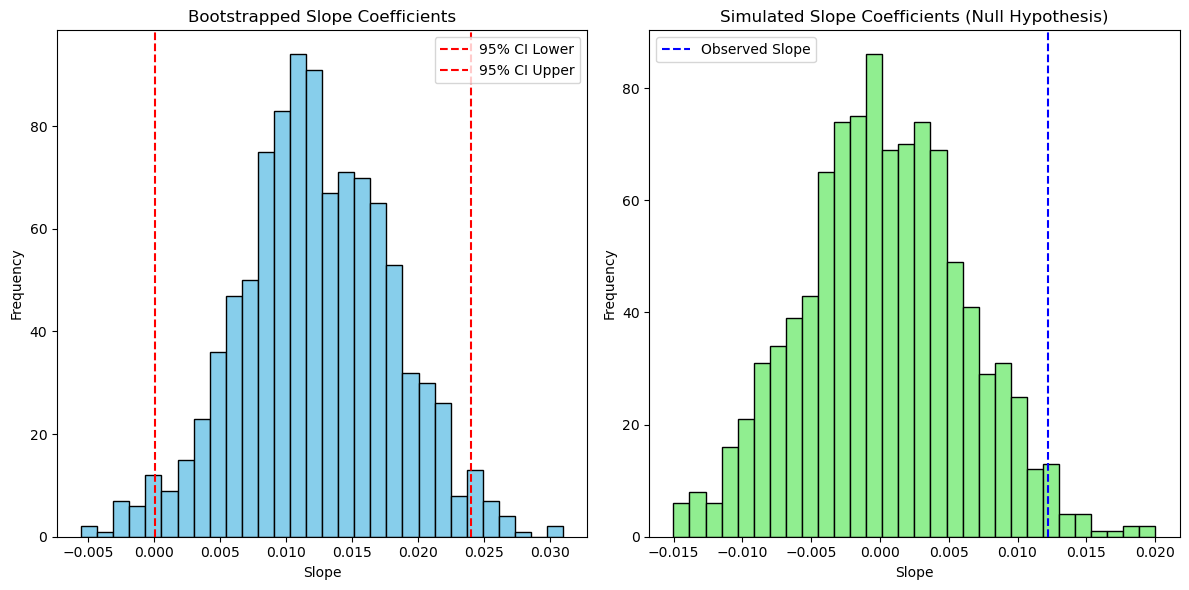

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')
long_wait_limit = 71  # Limit for long wait times
long_wait = old_faithful['waiting'] > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Parameters for null hypothesis simulation
beta0_null = 1.65
beta1_null = 0
sigma_null = 0.37
n_bootstrap = 1000
n_simulations = 1000
sample_size = len(long_wait_data)

# Step 1: Bootstrap sampling to get the sampling distribution of the slope
bootstrap_slopes = []
for _ in range(n_bootstrap):
    bootstrap_sample = long_wait_data.sample(n=sample_size, replace=True)
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrap_slopes.append(model.params['waiting'])

# Step 2: Simulation under the null hypothesis (no linear association)
simulated_slopes = []
for _ in range(n_simulations):
    # Simulate duration under the null hypothesis
    old_faithful_simulation = long_wait_data.copy()
    old_faithful_simulation['duration'] = (
        beta0_null + beta1_null * old_faithful_simulation['waiting'] +
        np.random.normal(0, sigma_null, sample_size)
    )
    simulated_model = smf.ols('duration ~ waiting', data=old_faithful_simulation).fit()
    simulated_slopes.append(simulated_model.params['waiting'])

# Step 3: Calculate the 95% confidence interval for bootstrapped slopes
bootstrap_slopes = np.array(bootstrap_slopes)
conf_interval = np.quantile(bootstrap_slopes, [0.025, 0.975])
print("95% Bootstrapped Confidence Interval for Slope:", conf_interval)

# Step 4: Calculate the simulated p-value
observed_slope = smf.ols('duration ~ waiting', data=long_wait_data).fit().params['waiting']
simulated_slopes = np.array(simulated_slopes)
simulated_p_value = (np.abs(simulated_slopes) >= np.abs(observed_slope)).mean()
print("Simulated p-value under null hypothesis:", simulated_p_value)

# Visualization of the distributions
plt.figure(figsize=(12, 6))

# Histogram of bootstrapped slope coefficients
plt.subplot(1, 2, 1)
plt.hist(bootstrap_slopes, bins=30, color='skyblue', edgecolor='black')
plt.axvline(conf_interval[0], color='red', linestyle='dashed', label='95% CI Lower')
plt.axvline(conf_interval[1], color='red', linestyle='dashed', label='95% CI Upper')
plt.title("Bootstrapped Slope Coefficients")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.legend()

# Histogram of simulated slope coefficients under null hypothesis
plt.subplot(1, 2, 2)
plt.hist(simulated_slopes, bins=30, color='lightgreen', edgecolor='black')
plt.axvline(observed_slope, color='blue', linestyle='dashed', label='Observed Slope')
plt.title("Simulated Slope Coefficients (Null Hypothesis)")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


### Explanation of Each Step

1. **Bootstrap Sampling of Slopes**:
   - We take 1,000 bootstrap samples from the long wait times data, fit a regression model for each sample, and collect the fitted slope coefficients.
   - This gives us a distribution of slope estimates, which we use to calculate the 95% confidence interval.

2. **Simulation under Null Hypothesis**:
   - We simulate 1,000 datasets assuming no linear association by setting the slope to zero ( \( \beta_1 = 0 \) ), while using \( \beta_0 = 1.65 \) and \( \sigma = 0.37 \).
   - For each simulated dataset, we fit a regression model and collect the fitted slope coefficient to form a distribution under the null hypothesis.

3. **Calculate 95% Confidence Interval for Bootstrapped Slopes**:
   - We find the 2.5th and 97.5th percentiles of the bootstrapped slope coefficients to create the 95% confidence interval.

4. **Calculate Simulated p-value**:
   - We calculate the p-value by determining the proportion of simulated slopes (under the null hypothesis) that are as extreme or more extreme than the observed slope from the actual data.

### Interpretation of Results

- **95% Confidence Interval**: If the interval does not include 0, it suggests that the slope is significantly different from zero in the observed data, indicating a possible linear association.
- **Simulated p-value**: A low p-value (e.g., less than 0.05) would provide evidence against the null hypothesis, suggesting that the observed slope is unlikely to have occurred by chance if there were no true linear association.


## Q11

### Big Picture Differences
The main difference between the indicator variable model and the continuous models is in how they treat the relationship between wait time and eruption duration:

- **Indicator Variable Model**: This model categorizes wait times as "short" or "long" based on a threshold, comparing the average eruption duration between these two groups. It’s simpler and doesn’t assume a continuous linear relationship, making it useful if there’s a threshold effect (e.g., durations differ significantly only after a certain wait time). However, results depend on the chosen cutoff.

- **Continuous Models**: These models assume a linear relationship across all wait times, with duration increasing consistently with each additional minute of wait time. They provide a more detailed view of the minute-by-minute effect but rely on the assumption that this linear relationship holds across the entire range.

In summary, the indicator model is useful for highlighting differences between distinct categories, while the continuous models are better suited for capturing a steady, linear relationship across all values of wait time. The choice depends on whether there’s a threshold effect or a continuous trend in the data.


### Explanation of the Code

- **Indicator Variable**: We created a new column `kind` in the dataset, which assigns a value of "short" for wait times below 68 minutes and "long" otherwise.
- **Model Specification**: We used `C(kind, Treatment(reference="short"))` in the formula to indicate that `kind` is a categorical variable with "short" as the reference category. This way, the model estimates the intercept for "short" wait times and a contrast (difference) for "long" wait times.
- **Box Plot**: The box plot visualizes the distribution of eruption durations for "short" and "long" wait times, allowing us to visually inspect any differences between the groups.


Here’s the code that performs these steps:

In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px
import seaborn as sns
from IPython.display import display

# Load the Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Define the indicator variable 'kind' for wait times
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'short' if x < 68 else 'long')

# Fit the linear regression model using the indicator variable
indicator_model = smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()

# Display the model summary to examine the evidence against the null hypothesis
display(indicator_model.summary().tables[1])

# Visualize the relationship between 'kind' and 'duration' using a box plot
fig = px.box(old_faithful, x='kind', y='duration',
             title='Duration by Wait Time Category',
             category_orders={'kind': ['short', 'long']})
fig.show()  # Use `fig.show(renderer="png")` if submitting to GitHub or MarkU

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


## Q12

To assess the plausibility of the assumption that the distribution of error terms is normal for each of the models, we look at the histograms of the residuals (or error terms) for each model. A histogram suggesting normality will show a symmetric, bell-shaped distribution centered around zero. Here’s how to identify which histogram supports the normality assumption and why others may not:

1. **Histogram Supporting Normality**:
   - The histogram that best supports the normality assumption will display a **symmetric bell curve**, with most values clustering around zero and tapering off evenly in both directions. This shape aligns with the characteristics of a normal distribution and suggests that the errors are likely normally distributed.

2. **Histograms That Do Not Support Normality**:
   - **Skewed Distribution**: If a histogram shows a skew (either to the left or right), it indicates that the error terms are not symmetrically distributed around zero. This violates the normality assumption because a normal distribution should be symmetric.
   - **Heavy Tails**: A histogram with very high frequencies at the tails suggests that there are more extreme error terms than expected in a normal distribution. This indicates that the error terms may follow a distribution with heavier tails, such as a t-distribution, rather than a normal distribution.
   - **Bimodal or Multimodal Distribution**: If the histogram has two peaks or multiple modes, it implies that there might be different subgroups or clusters within the data, each with its own distribution of error terms. This would suggest that a single normal distribution does not adequately describe the error terms, as a normal distribution has only one peak.

In summary:
- **The histogram suggesting normality** will show a symmetric, bell-shaped curve centered around zero.
- **The other histograms** deviate from this shape, either by being skewed, having heavy tails, or displaying multiple peaks, each of which contradicts the normality assumption of the error terms.

## Q13

To address this problem, we need to perform two types of tests to compare the mean durations between "short" and "long" wait times for the Old Faithful Geyser data. The two methods are:

1. **Permutation Test** (Part A)
2. **Bootstrap Confidence Interval for the Difference in Means** (Part B)

### Part A: Permutation Test
The goal here is to test the null hypothesis:

\[
H_0: \mu_{\text{short}} = \mu_{\text{long}}
\]

which states that there is no difference in the mean duration between short and long wait times. We achieve this by shuffling the labels for "short" and "long" and calculating the difference in means multiple times to create a distribution under the null hypothesis.


Here’s the code for the permutation test:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns

# Load the Old Faithful Geyser dataset and define "kind" indicator variable
old_faithful = sns.load_dataset('geyser')
old_faithful['kind'] = old_faithful['waiting'].apply(lambda x: 'long' if x >= 68 else 'short')

# Observed difference in means between short and long wait times
observed_diff = old_faithful.groupby('kind')['duration'].mean().diff().iloc[-1]

# Permutation test
n_permutations = 1000
permuted_diffs = []
for _ in range(n_permutations):
    shuffled = old_faithful.assign(kind_shuffled=np.random.permutation(old_faithful['kind']))
    permuted_diff = shuffled.groupby('kind_shuffled')['duration'].mean().diff().iloc[-1]
    permuted_diffs.append(permuted_diff)

# Calculate p-value
p_value = (np.abs(permuted_diffs) >= np.abs(observed_diff)).mean()
print("Observed Difference in Means:", observed_diff)
print("Permutation Test p-value:", p_value)

Observed Difference in Means: -2.20360023255814
Permutation Test p-value: 0.0


### Part B: Bootstrap Confidence Interval for the Difference in Means
For the bootstrap approach, we will repeatedly sample within each group ("short" and "long") and calculate the difference in means for each resample to form a confidence interval.

Here’s the code for the bootstrap test:

In [6]:
n_bootstraps = 1000
bootstrap_diffs = []
for _ in range(n_bootstraps):
    bootstrap_sample = (
        old_faithful.groupby('kind')
        .apply(lambda x: x.sample(n=len(x), replace=True))
        .reset_index(drop=True)
    )
    bootstrap_diff = bootstrap_sample.groupby('kind')['duration'].mean().diff().iloc[-1]
    bootstrap_diffs.append(bootstrap_diff)

# Calculate 95% confidence interval
ci_lower, ci_upper = np.quantile(bootstrap_diffs, [0.025, 0.975])
print("95% Bootstrap Confidence Interval for Difference in Means:", (ci_lower, ci_upper))

95% Bootstrap Confidence Interval for Difference in Means: (-2.2979397151162795, -2.096380145348837)


### Interpretation of Results

1. **Permutation Test**:
   - The permutation test provides a p-value, which tells us the probability of observing a difference in means as extreme as the observed difference if there were no real difference between the groups.
   - A low p-value (e.g., below 0.05) indicates evidence against the null hypothesis, suggesting that the difference in means between short and long wait times is statistically significant.

2. **Bootstrap Confidence Interval**:
   - The bootstrap approach provides a 95% confidence interval for the difference in means. If the confidence interval does not contain zero, it suggests that there is a statistically significant difference in mean duration between short and long wait times.

### Part (a) Comparison of Sampling Approaches
- **Permutation Test**: This approach works by reshuffling the labels and recalculating the difference in means, creating a distribution under the null hypothesis.
- **Bootstrap Test**: This approach involves resampling with replacement within each group to estimate the variability in the mean difference, creating a confidence interval.

### Part (b) Comparison with Indicator Variable Model (from Question 11)
- **Similarity**: Both the permutation and bootstrap methods aim to estimate the difference in means between the two groups. The indicator variable model in Question 11 also tests for a difference between short and long wait times.
- **Difference**: The indicator variable model assumes a linear model with an indicator variable, which allows for direct estimation of group differences using regression coefficients. The permutation and bootstrap tests, however, do not assume a linear model and instead rely on resampling methods to evaluate the significance or confidence of the difference in means.

## Q14

In [ ]:
YES

## Summaries of ChatBot session of all questions¶

Here’s a summary of our interactions on this topic:

---

### 1. Simple Linear Regression Model Overview
   - We discussed the theoretical structure of the Simple Linear Regression model, covering components like the predictor and outcome variables, slope and intercept coefficients, and error terms. We also explored how these components combine to form predictions and how the OLS (Ordinary Least Squares) method fits the model by minimizing the sum of squared residuals.

### 2. Comparison of Theoretical and Fitted Models
   - We compared theoretical predictions (based on true parameters) with fitted values (based on estimated parameters from observed data) and visualized both lines to illustrate sampling variation. This helped in understanding the distinction between the “true” relationship and the estimated one.

### 3. Error Distribution Assumptions
   - We examined histograms of residuals (error terms) to assess the plausibility of the normality assumption in the Simple Linear Regression model. A histogram showing a symmetric, bell-shaped curve around zero supports normality, while skewed, heavy-tailed, or multimodal distributions do not.

### 4. Analysis of Short and Long Wait Times
   - We explored the relationship between eruption duration and wait times by categorizing wait times as "short" (<68 minutes) or "long" (≥68 minutes). We used an indicator variable to differentiate these groups and fit a regression model to examine the mean difference in durations. This approach was contrasted with continuous models, highlighting the different interpretations (average difference vs. continuous change) and assumptions (non-linear threshold vs. consistent linear relationship).

### 5. Permutation Test and Bootstrap Confidence Interval
   - For testing differences between “short” and “long” groups:
      - **Permutation Test**: We shuffled the group labels to create a null distribution and tested the null hypothesis that the mean durations between “short” and “long” groups are equal.
      - **Bootstrap Confidence Interval**: We created bootstrap samples within each group to estimate a 95% confidence interval for the difference in means. This approach provided an interval estimate without assuming normality.
   - We compared these methods with the indicator variable regression model, noting that:
      - The **indicator model** is parametric, providing a regression-based estimate of mean difference.
      - The **permutation test** is non-parametric, testing for statistical significance by comparing observed differences to a null distribution.
      - The **bootstrap method** is non-parametric, constructing a confidence interval to estimate the effect size.

---

This summary captures the key points and distinctions made in our interactions, covering theoretical insights, empirical analysis, and different methods for comparing "short" and "long" wait times in the context of geyser eruption data.

Since the conversation contain picture, it's unavailable to provide link.